<a href="https://colab.research.google.com/github/gil612/NLP/blob/main/NLP_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Fundamentals in TensorFlow

NLP has the goal of deriving information out of natural language (could be sequences text os speech)

Anothe common term for NLP problems is `seq2seq` problems.


# Connect to GPU

In [1]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-10-18 22:57:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-10-18 22:57:31 (105 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

unzip_data("nlp_getting_started.zip")

--2023-10-18 22:57:35--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.172.207, 172.217.212.207, 108.177.112.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.172.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2023-10-18 22:57:35 (145 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [3]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# New Section

In [4]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [5]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [6]:
# What does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [8]:
len(train_df), len(test_df)

(7613, 3263)

In [9]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [10]:
import random
random_index = random.randint(0,len(train_df) - 5)
# Create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text","target"]][random_index: random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")



Target: 1 (real disaster)
Text:
Burned dog finds new home with young burn victim http://t.co/Pqrjvgvgxg

---

Target: 0 (not real disaster)
Text:
This is a tragedy: I added the wrong book to my TBR list now I can't find the right one. This is what comes of browsing just on gr homepage.

---

Target: 0 (not real disaster)
Text:
I keep scrolling to find out what he said or did....but there seems to be no exact starting point.  Wounds run deep. : /

---

Target: 0 (not real disaster)
Text:
@laevantine Fortunately I reworked the plumbing on my emergency chemical shower to draw from the glitter pipe for just such an occasion

---

Target: 1 (real disaster)
Text:
@PyramidHead76 one good thing came out of watching the film.  Was too traumatised to watch show so started Halt &amp; Catch Fire on Amazon. :D

---



In [11]:
train_df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


## Split data into training and validation sets

In [12]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [13]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [14]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Convert text into number

When dea;ingwith a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.

There are a few ways to do this, namely:
* Tokenization - direct mapping of token (a token could be a word or a character) to number
* Embedding - create a matrix of feature vector for each token (the size of the feature  vector can be defined and this embedding can be learned)

### Text vectorization (tokenization)

In [15]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [16]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


In [17]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization # after TensorFlow 2.6

# Before TensorFlow 2.6
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [18]:
# train_sentences[0]

twt = "@mogacola @zamtriossu i screamed after hitting tweet"
twt.split(), len(twt.split())


(['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet'], 7)

In [19]:
# Find the average number of tokens (words) in the training tweets

round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [20]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [21]:
## adapt()
# Computes a vocabulary of string terms from tokens in a dataset.

# Calling adapt() on a TextVectorization layer is an alternative to
# passing in a precomputed vocabulary on construction via the vocabulary
# argument. A TextVectorization layer should always be either adapted
# over a dataset or supplied with a vocabulary.

# During adapt(), the layer will build a vocabulary of all string tokens
# seen in the dataset, sorted by occurrence count, with ties broken by
# sort order of the tokens (high to low). At the end of adapt(), if
# max_tokens is set, the vocabulary wil be truncated to max_tokens
# size. For example, adapting a layer with max_tokens=1000 will compute
# the 1000 most frequent tokens occurring in the input dataset. If
# output_mode='tf-idf', adapt() will also learn the document
# frequencies of each token in the input dataset.

# In order to make TextVectorization efficient in any distribution
# context, the vocabulary is kept static with respect to any compiled
# tf.Graphs that call the layer. As a consequence, if the layer is
# adapted a second time, any models using the layer should be re-compiled.
# For more information see
# tf.keras.layers.experimental.preprocessing.PreprocessingLayer.adapt.

# adapt() is meant only as a single machine utility to compute layer
# state.  To analyze a dataset that cannot fit on a single machine, see
# [Tensorflow Transform](
# https://www.tensorflow.org/tfx/transform/get_started) for a
# multi-machine, map-reduce solution.

# Arguments:
#   data: The data to train on. It can be passed either as a
#       tf.data.Dataset, or as a numpy array.
#   batch_size: Integer or None.
#       Number of samples per state update.
# If unspecified, batch_size will default to 32.
# Do not specify the batch_size if your data is in the
# form of datasets, generators, or keras.utils.Sequence instances
# (since they generate batches).
#   steps: Integer or None.
#       Total number of steps (batches of samples)
# When training with input tensors such as
# TensorFlow data tensors, the default None is equal to
# the number of samples in your dataset divided by
# the batch size, or 1 if that cannot be determined. If x is a
# tf.data dataset, and 'steps' is None, the epoch will run until
# the input dataset is exhausted. When passing an infinitely
# repeating dataset, you must specify the steps argument. This
# argument is not supported with array inputs.


# fit the text vectorizer
text_vectorizer.adapt(train_sentences)

In [22]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [23]:
import random

In [24]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Always look for the silver lining!  

My barn having burned to the ground
I can now see the moon.
~ Mizuta... http://t.co/Gl4McaX0ny      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 262,  173,   10,    2, 1112,    1,   13, 4114,  652,  466,    5,
           2, 1206,    8,   71]])>

In [25]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in our training data
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words = words_in_vocab[-5:] # get the least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words in vocab: {top_5_words}")
print(f"5 least common words in vocab: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words in vocab: ['', '[UNK]', 'the', 'a', 'in']
5 least common words in vocab: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [26]:
train_sentences

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

### Creating an Embedding using an Embedding Layer

To make out embedding, we're going to use TF's layer: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

Thhe parameters we care most about for our embedding layer:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
* `input_length` = length of the sequences being passed to the embedding layer

In [27]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

In [28]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Bairstow dropped his buffet ticket there. Devastated for the lad.      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.007904  ,  0.04360149,  0.03217748, ...,  0.00781109,
          0.03944418, -0.0236097 ],
        [ 0.04444405,  0.00865176,  0.00418383, ...,  0.01418494,
         -0.04121869,  0.03474209],
        [ 0.01564482, -0.01488937, -0.01913294, ...,  0.03115443,
         -0.04365454, -0.04754719],
        ...,
        [ 0.04617622, -0.03476221, -0.03715776, ..., -0.01610348,
         -0.01061627,  0.04021591],
        [ 0.04617622, -0.03476221, -0.03715776, ..., -0.01610348,
         -0.01061627,  0.04021591],
        [ 0.04617622, -0.03476221, -0.03715776, ..., -0.01610348,
         -0.01061627,  0.04021591]]], dtype=float32)>

In [29]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.007904  ,  0.04360149,  0.03217748, -0.04872224,  0.01701326,
        -0.03299997, -0.01776459, -0.02084631, -0.04889971,  0.0330098 ,
         0.04143092,  0.0306172 ,  0.00981768, -0.0058933 ,  0.00136862,
         0.02348181,  0.0481074 ,  0.04668484,  0.02665159,  0.00442008,
        -0.03577722,  0.01042992, -0.00441301,  0.00205202,  0.01368756,
        -0.0063936 , -0.03184273, -0.0104162 ,  0.0128114 ,  0.04252745,
        -0.02097958,  0.00637627, -0.04142714, -0.04608094,  0.03955754,
        -0.02770509, -0.02126641,  0.02472165,  0.01064866,  0.03891361,
        -0.03937194, -0.04807127,  0.02086016,  0.01919899, -0.00352671,
        -0.0476993 , -0.03537872,  0.01365233, -0.03207665, -0.04026134,
         0.03086127, -0.00573363, -0.02074534, -0.02722944, -0.03710476,
        -0.04498278,  0.02091572, -0.00545297,  0.01653533,  0.00957639,
        -0.00194494, -0.00036374,  0.01891115, -0.02571827, -0.04124536,
  

In [30]:
# Text vectorization / toeknization is converting words to some numrical format

## Modelling and text dataset (running a series of experiments)

Now we've got a way to turn our text sequences into numbers, it's time to start building a series od modelling experiments.

We'll start with a baseline and move on from there.

* Model 0: Naive Bayes (baseline)
* Model 1: Feed_forward nueral netwerok (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirictional-LSTM model (RNN)
* Modle 5: 1D Convolutional NN (CNN)
* Model 6: TF Hub Pretrained Feature Extractor (using Transfer Learning TL for NLP)
* Model 7: Same as model 6 with 10% of trainig data

How are we going to approach all of these?

Use standard steps in modelling with TF:
* Create a model
* Build a model
* Fit a model
* Evaluate our model

### Model 0: Getting a baseline

As with all machimne learning modelling experiments, it's important ro create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baselin, we'l use Sklearn;s Multinomial NB using the TF-IDF formula to convert our words to numbers.

> **Note:** It's a common practice to use non-DL algorithms as baseline because of their speed and then later using their DL to see if you can improve upon them.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [32]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [33]:
train_df.value_counts()

id     keyword   location                        text                                                                                                                                 target
48     ablaze    Birmingham                      @bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C                                                                              1         1
7166   mudslide  Chiswick, London                2 great new recipes; mudslide cake and so sorry stew! #GBBO                                                                          0         1
7178   mudslide  Edinburgh                       @hazelannmac ooh now I feel guilty about wishing hatman out. I bet the mudslide was delicious!                                       0         1
7176   mudslide  London                          First impressions: glad hat man is leaving in lieu of more interesting ladies. Hope mudslide lady triumphs next week.                0         1
7174   mudslide  The Pumpkin Carria

In [34]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments

We could evaluate all of our model's predictions with different metrics every time, however this will be fixed with a function.

Let's create one to compare our model's predictions with the truth labels using the following metrics:

* Accuracy
* Precision
* Recall
* F1-score

In [35]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [36]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: A simple dense Model


In [37]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [38]:
# # Build model with the Functional API
# from tensorflow.keras import layers
# inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
# x = text_vectorizer(inputs) # turn the input text into numbers
# x = embedding(x) # create an embedding of the numerized numbers
# #x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
# outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
# model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [39]:
# Get a summary of the model
# model_1.summary()

# Once it goes from a text vectorization to embedding every token, so all 15 tokens get represened as a 128 long feature vector,
# and then we pass this embedding through our final dense layer, which outputs the size of 1.

In [40]:
# # Compile model
# model_1.compile(loss="binary_crossentropy",
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=["accuracy"])

In [41]:
# # Fit the model
# model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
#                               train_labels,
#                               epochs=5,
#                               validation_data=(val_sentences, val_labels),
#                               callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
#                                                                      experiment_name="simple_dense_model")])

In [42]:
# # Check the results
# model_1.evaluate(val_sentences, val_labels)

In [43]:
# #Make some predictions and evaluate those
# model_1_pred_probs = model_1.predict(val_sentences)
# model_1_pred_probs.shape

# # It's outputing prediction probability for each token -> poor results

In [44]:
# model_1_pred_probs[0]

In [45]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [46]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [47]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [48]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20231018-225741
Epoch 1/5
215/215 [==============================] - 20s 67ms/step - loss: 0.6101 - accuracy: 0.6933 - val_loss: 0.5356 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4414 - accuracy: 0.8193 - val_loss: 0.4686 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3467 - accuracy: 0.8606 - val_loss: 0.4586 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2852 - accuracy: 0.8913 - val_loss: 0.4638 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2384 - accuracy: 0.9120 - val_loss: 0.4764 - val_accuracy: 0.7874


In [49]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.7874


[0.4764096736907959, 0.787401556968689]

In [50]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.02879242, -0.0183848 , -0.02101866, ...,  0.0014853 ,
          0.00415954,  0.02339257],
        [ 0.00554465,  0.0446037 ,  0.02845179, ...,  0.01005929,
          0.03829857, -0.0252034 ],
        [ 0.00381892, -0.01530387, -0.00073734, ..., -0.02003816,
         -0.0055426 ,  0.03196618],
        ...,
        [ 0.02261111,  0.01604754, -0.02085548, ..., -0.03935739,
          0.02902204,  0.01079624],
        [ 0.00789878,  0.08785239,  0.08917995, ...,  0.06656799,
          0.0677145 , -0.01081598],
        [-0.08286417,  0.06851995,  0.08314088, ...,  0.04493423,
          0.0812079 , -0.06114808]], dtype=float32)>]

In [51]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [52]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # only

24/24 [==============================] - 0s 2ms/step


array([[0.41822433],
       [0.74622923],
       [0.9977729 ],
       [0.11131873],
       [0.10706972],
       [0.9350473 ],
       [0.9132215 ],
       [0.9929985 ],
       [0.9697076 ],
       [0.2613321 ]], dtype=float32)

In [53]:
model_1_pred_probs[0]
# Anything under threshold 0.4955 is going to get label 0

array([0.41822433], dtype=float32)

In [54]:
model_1_pred_probs[:10]

array([[0.41822433],
       [0.74622923],
       [0.9977729 ],
       [0.11131873],
       [0.10706972],
       [0.9350473 ],
       [0.9132215 ],
       [0.9929985 ],
       [0.9697076 ],
       [0.2613321 ]], dtype=float32)

In [55]:
val_labels

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [56]:
# convert model prediction probabilities tp label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [57]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.74015748031496,
 'precision': 0.7914920592553047,
 'recall': 0.7874015748031497,
 'f1': 0.7846966492209201}

In [58]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [59]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

### Visualizing learned embeddings

In [60]:
# get the vocaulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [61]:
# get the weight matrix of embedding layeer
# (these are the numerical representations of each token in our training data, which have been learned for 5 epochs))
embed_Weights = model_1.get_layer("embedding_1").get_weights()
embed_Weights

[array([[ 0.02879242, -0.0183848 , -0.02101866, ...,  0.0014853 ,
          0.00415954,  0.02339257],
        [ 0.00554465,  0.0446037 ,  0.02845179, ...,  0.01005929,
          0.03829857, -0.0252034 ],
        [ 0.00381892, -0.01530387, -0.00073734, ..., -0.02003816,
         -0.0055426 ,  0.03196618],
        ...,
        [ 0.02261111,  0.01604754, -0.02085548, ..., -0.03935739,
          0.02902204,  0.01079624],
        [ 0.00789878,  0.08785239,  0.08917995, ...,  0.06656799,
          0.0677145 , -0.01081598],
        [-0.08286417,  0.06851995,  0.08314088, ...,  0.04493423,
          0.0812079 , -0.06114808]], dtype=float32)]

In [62]:
embed_Weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_Weights.shape)

(10000, 128)


Now we've go the embedding matrix our model has learned to represent our tokens, let's see how we can visualize it.

To do so, TF has a handy tool called projector

And TF also has an incredible guide on word embeddings

In [63]:
# Create embedding  files
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_Weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [64]:
# download files from Colab to upload to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Network (RNN)

useful for sequence data

The premise of a recurrent neural network is tp se represantation of a previous input to aid the representation of a later input.


Overview of the internals of the recurrent neural network:
MIT's sequence modelling lecture
Chris Olah LSTM
Andrej Karpathy

### Model 2:LSTM

LSTM = Long Short Term memory (one of the most popular LSTM cells)

Our structure of an RNN typically looks like this:

```
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability)
```

In [65]:
# create an LSTM model

from tensorflow.keras import layers


inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
# x = layers.LSTM(units = 64, return_sequences = True) (x) # whe you're stacking RNN together, you need to set return_seqences = True
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
# x = layers.Dense(64, activation = "relu")(x)
# print(x.shape)
outputs = layers.Dense(1, activation ="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name = "model_s_LSTM")

In [66]:
# Get a summary
model_2.summary()

Model: "model_s_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [67]:
# Compile th emodel
model_2.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [68]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback (SAVE_DIR,
                                                                        "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20231018-225825
Epoch 1/5
215/215 [==============================] - 15s 54ms/step - loss: 0.2213 - accuracy: 0.9216 - val_loss: 0.5394 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1615 - accuracy: 0.9410 - val_loss: 0.6049 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1273 - accuracy: 0.9524 - val_loss: 0.7452 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1058 - accuracy: 0.9603 - val_loss: 0.8513 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0821 - accuracy: 0.9660 - val_loss: 0.9546 - val_accuracy: 0.7795


In [69]:
# Make preidctions with LSTM model
model_2_preds_probs = model_2.predict(val_sentences)
model_2_preds_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[5.1477458e-03],
       [7.0223308e-01],
       [9.9957615e-01],
       [2.5252968e-02],
       [2.2568236e-04],
       [9.9648052e-01],
       [8.0785078e-01],
       [9.9975628e-01],
       [9.9960774e-01],
       [4.9693736e-01]], dtype=float32)

In [70]:
# convert model 2 pred probs tp labels
model_2_preds = tf.squeeze (tf.round(model_2_preds_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [71]:
# Calculate model 2 results
model_2_results = calculate_results (y_true = val_labels,
                                     y_pred = model_2_preds)
model_2_results

{'accuracy': 77.95275590551181,
 'precision': 0.7822644211580037,
 'recall': 0.7795275590551181,
 'f1': 0.7771404562571971}

### Model 3: GRU

Another popular and effective RNN component is the GRU or gated recurrent Unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

In [72]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [73]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [74]:
# Get a summary of the GRU model
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [75]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20231018-225908
Epoch 1/5
215/215 [==============================] - 14s 54ms/step - loss: 0.5223 - accuracy: 0.7332 - val_loss: 0.4564 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3165 - accuracy: 0.8699 - val_loss: 0.4972 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2179 - accuracy: 0.9174 - val_loss: 0.5740 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1587 - accuracy: 0.9453 - val_loss: 0.6218 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1209 - accuracy: 0.9584 - val_loss: 0.6238 - val_accuracy: 0.7677


In [76]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[0.35208505],
        [0.89101976],
        [0.9970114 ],
        [0.11148683],
        [0.01582709],
        [0.99240947],
        [0.63708305],
        [0.9980013 ],
        [0.9976967 ],
        [0.34071735]], dtype=float32))

In [77]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [78]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 76.77165354330708,
 'precision': 0.7675450859410361,
 'recall': 0.7677165354330708,
 'f1': 0.7667932666650168}

### Model 4: Bidirectional RNN

Normal RNN's go from left to right (just like you'd read an English sentence) however,  a bidirectional RNN goes from right to left as well as left to right.

In [79]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build a bidirectional RNN in Tensorflow
inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)
x=model_4_embedding(x)
# 128 because we're going for 2 directions
# x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)
print(x.shape)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name = "model_4_Bidirectional")

(None, 15, 128)


In [80]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [81]:
# Get a summary
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               74496     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1354625 (5.17 MB)
Trainable par

In [82]:
# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [83]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback (SAVE_DIR,
                                                                        "model_4_Bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_Bidirectional/20231018-225952
Epoch 1/5
215/215 [==============================] - 17s 55ms/step - loss: 0.5190 - accuracy: 0.7362 - val_loss: 0.4565 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3102 - accuracy: 0.8717 - val_loss: 0.4917 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1997 - accuracy: 0.9221 - val_loss: 0.5541 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1322 - accuracy: 0.9577 - val_loss: 0.6418 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0987 - accuracy: 0.9672 - val_loss: 0.7020 - val_accuracy: 0.7651


In [84]:
# Make predictions with our bidirectional model
model_4_preds= model_4.predict(val_sentences)
model_4_preds[:10]

24/24 [==============================] - 1s 5ms/step


array([[0.13096514],
       [0.68443245],
       [0.9990195 ],
       [0.09260817],
       [0.00342464],
       [0.99947816],
       [0.6825772 ],
       [0.9999461 ],
       [0.99944335],
       [0.18003896]], dtype=float32)

In [85]:
# convert model 2 pred probs tp labels
# Without conversion we get ValueError: Classification metrics can't handle a mix of binary and continuous targets
model_4_preds = tf.squeeze (tf.round(model_4_preds))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [86]:
# Calculate model_4 metrics
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 76.50918635170603,
 'precision': 0.7662169502191715,
 'recall': 0.7650918635170604,
 'f1': 0.7631560582067719}

## Convolutional Neural Netweorks for Text (and other types of sequences)

We've used CNNs for images but images are typically 2D (height x width) ...however, our text data is 1D.

Previously we've Conv2D for our image data but now we're going to use Conv1D.

The typical structure of a Conv1D model for sequences (in our case, text):

```
Inputs(text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D + pooling) -> Outputs (class probabilities)
```

### Model 5: Conv1D

In [87]:
# Test out our embedding layer, Conv1D layer and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sequence nto embedding
conv_1d = layers.Conv1D(filters=64,
                        kernel_size = 5, # This is also referred to as an ngram of 5 (meaning it looks art 5 words at a time)
                        strides = 1, # default
                        activation = "relu",
                        padding = "valid") # default = "valid", the output is smaller than the output shape, "same" means output is same shape as input
conv_1d_output = conv_1d(embedding_test) # pass test embedding through conv1D layer
max_pool = layers.GlobalAveragePooling1D()
# convert it to one feature of 32
max_pool_output = max_pool(conv_1d_output) # equivalent to "get the most important feature" or "get th efeature with the highest value"

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 64]), TensorShape([1, 64]))

In [88]:
#embedding_test

In [89]:
# conv_1d_output

In [90]:
# max_pool_output

In [91]:
# Create 1D convultional layer to model sequences
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="Conv1D")

# Build a bidirectional RNN in Tensorflow
inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)
x=model_5_embedding(x)
x = layers.Conv1D(filters = 64, kernel_size = 5, strides = 1, activation = "relu", padding = "valid")(x)
x = layers.GlobalMaxPool1D()(x)

outputs = layers.Dense(1, activation = "sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name = "model_5_Conv1D")


In [92]:
# Compile
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [93]:
# Get a summary
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 Conv1D (Embedding)          (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_4 (Dense)             (None, 1)              

In [94]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback (SAVE_DIR,
                                                                        "model_5_Conv1D")])

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20231018-230025
Epoch 1/5
215/215 [==============================] - 14s 52ms/step - loss: 0.5513 - accuracy: 0.7256 - val_loss: 0.4675 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3349 - accuracy: 0.8638 - val_loss: 0.4777 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2095 - accuracy: 0.9231 - val_loss: 0.5434 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1315 - accuracy: 0.9568 - val_loss: 0.6304 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0916 - accuracy: 0.9685 - val_loss: 0.6883 - val_accuracy: 0.7795


In [95]:
# Make predictions with our bidirectional model
model_5_preds= model_5.predict(val_sentences)
model_5_preds[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.70341414],
       [0.7814106 ],
       [0.9997888 ],
       [0.05082481],
       [0.01062618],
       [0.99266255],
       [0.9174427 ],
       [0.99863005],
       [0.9998092 ],
       [0.13389975]], dtype=float32)

In [96]:
# convert model 2 pred probs tp labels
# Without conversion we get ValueError: Classification metrics can't handle a mix of binary and continuous targets
model_5_preds = tf.squeeze (tf.round(model_5_preds))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [97]:
# Calculate model_5 metrics
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 77.95275590551181,
 'precision': 0.7822644211580037,
 'recall': 0.7795275590551181,
 'f1': 0.7771404562571971}

### Model 6: TensoFlow Hub Pretrained Sentence Encoder

"The Universal Sentence Encoder encodes text into high-dimensional vectors that can be used for text classification, semantic similarity, clustering and other natural language tasks."

In [98]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(embeddings[0][:50])

tf.Tensor(
[-0.03133019 -0.06338634 -0.01607501 -0.01034895 -0.04650102  0.03723157
  0.00591583  0.07174398  0.01666446  0.06090764  0.06655257  0.02370515
  0.00057646  0.05684322  0.02416169 -0.00533627  0.04704773  0.01921571
  0.07682553  0.0056696  -0.07528222 -0.01713724 -0.07502711  0.07637348
 -0.0543796  -0.0013891  -0.01830184 -0.0467204  -0.04724139  0.02706785
  0.0323334   0.05537061  0.03370955 -0.01370663  0.00552707 -0.08226925
  0.01419507  0.06827912  0.01832052 -0.02147872  0.04149668 -0.02027401
 -0.00601058  0.02448247 -0.0884009  -0.02566543 -0.03832614 -0.05610626
  0.04681281  0.03203126], shape=(50,), dtype=float32)


In [99]:
# Output is always 512
print(embeddings[0].shape)

(512,)


In [100]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [],
                                        dtype = tf.string,
                                        trainable = False,
                                        name = "USE"
                                        )

In [101]:
# Create model using the Seqeuntial API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation = "relu"),
    layers.Dense(1, activation = "sigmoid", name = "output_layer")
],
   name="model_6_USE"
)

# Compile
model_6.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [102]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback (SAVE_DIR, "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20231018-230136
Epoch 1/5
215/215 [==============================] - 16s 29ms/step - loss: 0.5026 - accuracy: 0.7856 - val_loss: 0.4480 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 7s 32ms/step - loss: 0.4149 - accuracy: 0.8139 - val_loss: 0.4367 - val_accuracy: 0.8123
Epoch 3/5
215/215 [==============================] - 5s 25ms/step - loss: 0.4002 - accuracy: 0.8212 - val_loss: 0.4326 - val_accuracy: 0.8163
Epoch 4/5
215/215 [==============================] - 7s 32ms/step - loss: 0.3926 - accuracy: 0.8251 - val_loss: 0.4280 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 5s 24ms/step - loss: 0.3860 - accuracy: 0.8300 - val_loss: 0.4296 - val_accuracy: 0.8163


In [103]:
# Make predictions with USE TF hub Model
model_6_pred_prob = model_6.predict(val_sentences)
model_6_pred_prob[:10]

24/24 [==============================] - 1s 16ms/step


array([[0.14522912],
       [0.7454452 ],
       [0.986283  ],
       [0.19057518],
       [0.72284067],
       [0.6751487 ],
       [0.97807056],
       [0.97565275],
       [0.9259278 ],
       [0.08851015]], dtype=float32)

In [104]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_prob))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [105]:
# Calculate model_6 metrics
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.8190827553840537,
 'recall': 0.8162729658792651,
 'f1': 0.8146067773916925}

In [106]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [107]:
len(train_sentences)

6851

### Model 7: TF Hub Pretrained USE but with 10% of training data

Transfer Learning really helps when you don't have  a large dataet.

To see how our model performs on a smaller dataset, let's replicate `model_6` except we'll train it in 10% of the data.

In [108]:
# Creat esubsets of 10% of training data
train_10_percent = train_df_shuffled[["text", "target"]].sample(frac = 0.1, random_state = 42)
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()

In [109]:
# Checkl the number of targets of number of targets in our subset of data
train_10_percent["target"].value_counts()

0    413
1    348
Name: target, dtype: int64

In [110]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

To recreate a model the same as a previous model you've created you can use the `tf.keras.models.clone_model()` method.

In [111]:
# NOTE: Making data splits like below leads to data leakage
# DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION / TEST SETS INTO TRAINING SETS

# Let's build a model the same as model_6
model_7 = tf.keras.models.clone_model(model_6)

# Compile
model_7.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [112]:
# Train data subsets
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback (SAVE_DIR, "tf_hub_sentence_encoder_10_percent")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent/20231018-230228
Epoch 1/5
24/24 [==============================] - 4s 46ms/step - loss: 0.6718 - accuracy: 0.6820 - val_loss: 0.6338 - val_accuracy: 0.8123
Epoch 2/5
24/24 [==============================] - 1s 26ms/step - loss: 0.6002 - accuracy: 0.8042 - val_loss: 0.5561 - val_accuracy: 0.8110
Epoch 3/5
24/24 [==============================] - 1s 26ms/step - loss: 0.5241 - accuracy: 0.8068 - val_loss: 0.4864 - val_accuracy: 0.8110
Epoch 4/5
24/24 [==============================] - 1s 25ms/step - loss: 0.4655 - accuracy: 0.8095 - val_loss: 0.4389 - val_accuracy: 0.8241
Epoch 5/5
24/24 [==============================] - 1s 26ms/step - loss: 0.4267 - accuracy: 0.8252 - val_loss: 0.4068 - val_accuracy: 0.8320


In [113]:
# Make predictions with the model trained on 10% of the data
model_7_pred_prob = model_7.predict(val_sentences)
model_7_pred_prob[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.24293822],
       [0.8113447 ],
       [0.900376  ],
       [0.26891518],
       [0.80705917],
       [0.8333757 ],
       [0.8685548 ],
       [0.92365897],
       [0.83598024],
       [0.06423029]], dtype=float32)

In [114]:
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_prob))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [115]:
# Calculate model_6 metrics
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 83.2020997375328,
 'precision': 0.8319951110061928,
 'recall': 0.8320209973753281,
 'f1': 0.831636991849395}

In [116]:
# Duoble Dipping
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_10_percent = train_sentences[:train_10_percent_split]
train_10_labels = train_labels[:train_10_percent_split]

In [117]:
train_10_percent[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [118]:
train_10_labels[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [119]:
# Check the number
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    413
1    348
dtype: int64

In [120]:
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback (SAVE_DIR, "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20231018-230236
Epoch 1/5
24/24 [==============================] - 1s 27ms/step - loss: 0.3995 - accuracy: 0.8344 - val_loss: 0.3829 - val_accuracy: 0.8412
Epoch 2/5
24/24 [==============================] - 1s 40ms/step - loss: 0.3783 - accuracy: 0.8423 - val_loss: 0.3636 - val_accuracy: 0.8478
Epoch 3/5
24/24 [==============================] - 1s 53ms/step - loss: 0.3606 - accuracy: 0.8489 - val_loss: 0.3470 - val_accuracy: 0.8556
Epoch 4/5
24/24 [==============================] - 1s 54ms/step - loss: 0.3451 - accuracy: 0.8568 - val_loss: 0.3323 - val_accuracy: 0.8635
Epoch 5/5
24/24 [==============================] - 1s 39ms/step - loss: 0.3312 - accuracy: 0.8660 - val_loss: 0.3190 - val_accuracy: 0.8701


In [121]:
# Make predictions with the model trained on 10% of the data
model_7_pred_prob = model_7.predict(val_sentences)
model_7_pred_prob[:10]

24/24 [==============================] - 1s 25ms/step


array([[0.12118662],
       [0.8236999 ],
       [0.97101   ],
       [0.28026912],
       [0.9033201 ],
       [0.87179995],
       [0.95100623],
       [0.9803569 ],
       [0.91154355],
       [0.0193494 ]], dtype=float32)

In [122]:
# The result shouldn't be the same!!!
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 83.2020997375328,
 'precision': 0.8319951110061928,
 'recall': 0.8320209973753281,
 'f1': 0.831636991849395}

### Comparing the performance of each of our model

In [123]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense_model":model_1_results,
                                  "model_2_LSTM":model_2_results,
                                  "GRU":model_3_results,
                                  "model_4_Bidirectional":model_4_results,
                                  "model_5_Conv1D":model_5_results,
                                  "tf_hub_sentence_encoder":model_6_results,
                                  "tf_hub_sentence_encoder_10_percent":model_7_results})
all_model_results.T

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense_model,78.740157,0.791492,0.787402,0.784697
model_2_LSTM,77.952756,0.782264,0.779528,0.777140
GRU,76.771654,0.767545,0.767717,0.766793
model_4_Bidirectional,76.509186,0.766217,0.765092,0.763156
model_5_Conv1D,77.952756,0.782264,0.779528,0.777140
tf_hub_sentence_encoder,81.627297,0.819083,0.816273,0.814607
tf_hub_sentence_encoder_10_percent,83.202100,0.831995,0.832021,0.831637


In [124]:
all_model_results = all_model_results.T
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense_model,0.787402,0.791492,0.787402,0.784697
model_2_LSTM,0.779528,0.782264,0.779528,0.777140
GRU,0.767717,0.767545,0.767717,0.766793
model_4_Bidirectional,0.765092,0.766217,0.765092,0.763156
model_5_Conv1D,0.779528,0.782264,0.779528,0.777140
tf_hub_sentence_encoder,0.816273,0.819083,0.816273,0.814607
tf_hub_sentence_encoder_10_percent,0.832021,0.831995,0.832021,0.831637


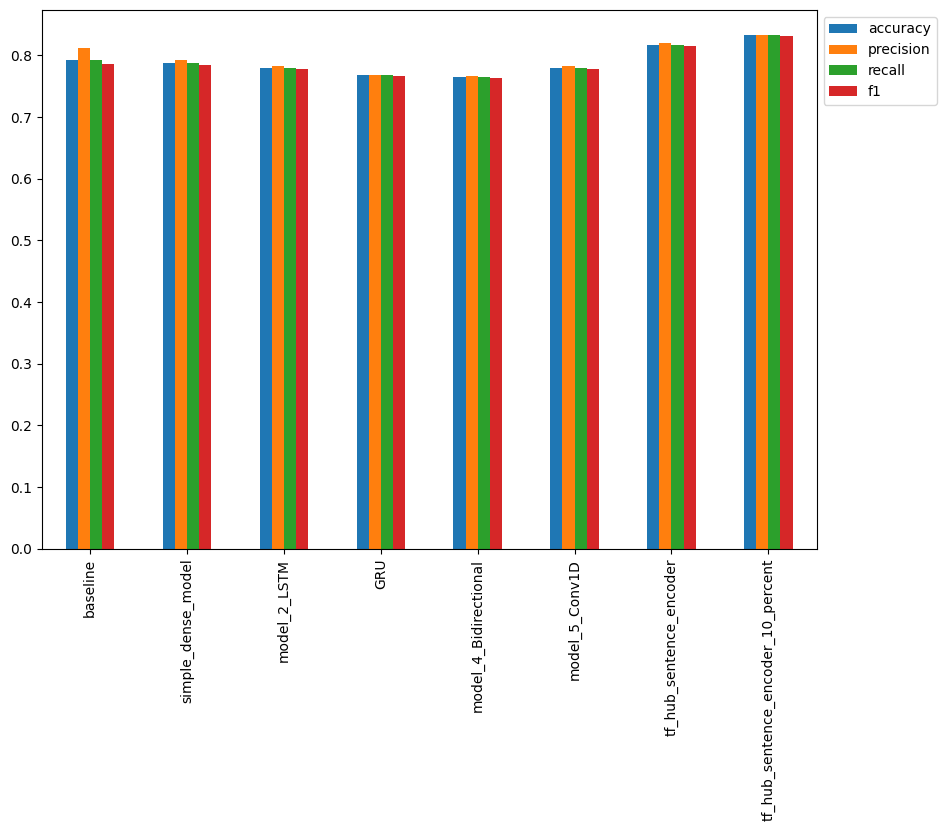

In [125]:
all_model_results.plot(kind = "bar", figsize = (10,7)).legend(bbox_to_anchor = (1.0,1.0));

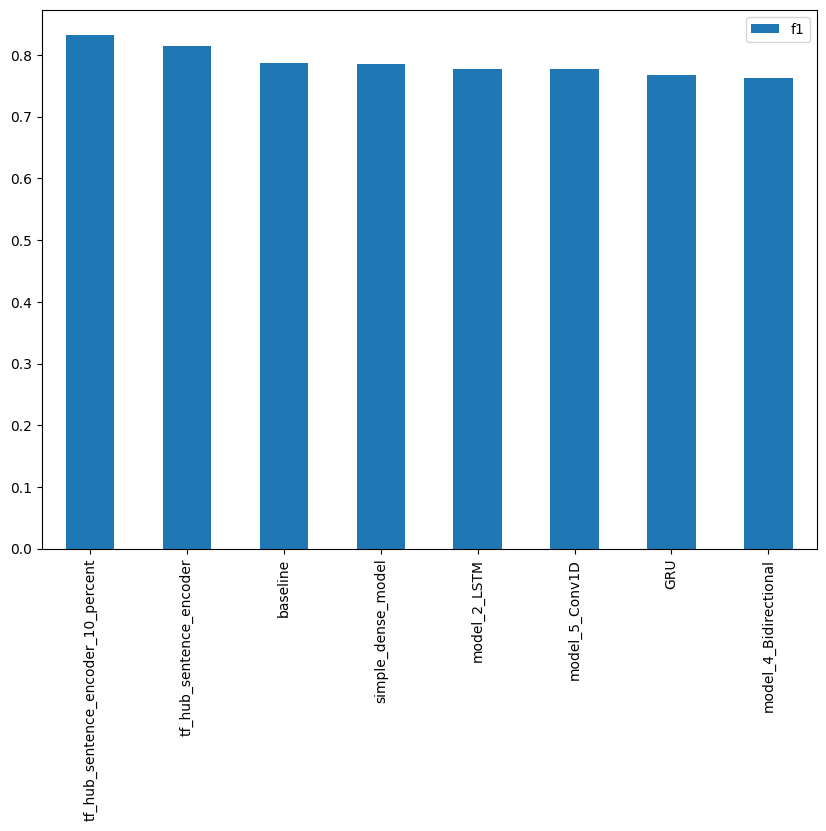

In [126]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending = False)["f1"].plot(kind = "bar", figsize = (10,7)).legend(bbox_to_anchor = (1.0,1.0));

## Saving and loading a trained model

In [128]:
# Save TF Hub model to HDF5 format
model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [130]:
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer" : hub.KerasLayer})

In [132]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 19ms/step - loss: 0.4296 - accuracy: 0.8163


[0.42964500188827515, 0.8162729740142822]

In [133]:
# https://www.tensorflow.org/tutorials/keras/save_and_load
model_6.save("model_6_SaveModel_format")

In [135]:
loaded_model_6_SavedModel_format = tf.keras.models.load_model("model_6_SaveModel_format")

In [136]:
loaded_model_6_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 19ms/step - loss: 0.4296 - accuracy: 0.8163


[0.42964500188827515, 0.8162729740142822]

In [137]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


## Finding the most wrong examples

* If our best model still isn't perfect, what examples is it getting wrong?
* And of these wrong examples which ones is it getting *most* wrong (those will prediction probabilties closest to thje oppsoite class)

For example if a sasmple should have a lbel of 0 but our model predicts a prediction probability of 0.999 (really close to 1) and vice versa.

In [138]:
# Download a pretrained model from google Storage
!wget "https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip"

# Unzip data
!unzip 08_model_6_USE_feature_extractor.zip


--2023-10-18 23:25:15--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.207, 142.250.128.207, 142.251.6.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  86.0MB/s    in 15s     

2023-10-18 23:25:30 (59.5 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables

In [141]:
# Import previously trained model from Google Storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [142]:
# Make predictions with the loaded model from GS
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10] # these should be in label format

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [144]:
# Create DataFrame woth validation sentences, validation label and best performing model predictions
val_df = pd.DataFrame({"text":val_sentences,
                       "target":val_labels,
                       "pred":model_6_pretrained_preds,
                       "pred_prob":tf.squeeze(model_6_pretrained_pred_probs)}) # we can run to squeeze to get ridof the extra one dimension.
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [145]:
# find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending = False)
most_wrong[:10] # these are False positive

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [147]:
most_wrong.tail() # these are flase negative

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043919
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


Let's remind ourselves of the target labels...
* 0 = not disaster
* 1 = disaster

In [148]:
# check the false positives (model predictied 1 when should've been 0)
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1.0, Prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1.0, Prob: 0.8769821524620056
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1.0, Prob: 0.8523001074790955
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1.0, Prob: 0.8354544043540955
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1.0, Prob: 0.8272132277488708
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Pred: 1.0, Prob: 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

In [150]:
# check the false negatives (model predictied 1 when should've been 0)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0.0, Prob: 0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0.0, Prob: 0.05507583171129227
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0.0, Prob: 0.05460337549448013
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0.0, Prob: 0.054597001522779465
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0.0, Prob: 0.049637261778116226
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0.0, Prob: 0.04391850158572197
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0.0, Prob: 0.